# Black Firday Data

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Data


        Variable  ======>	  Definition
        User_ID ======> 	  User ID
        Product_ID ======>	  Product ID
        Gender ======>	      Sex of User
        Age	 ======>          Age in bins
        Occupation  ======>   Occupation (Masked)
        City_Category  ======>	Category of the City (A,B,C)
        Stay_In_Current_City_Years ======>	Number of years stay in current city
        Marital_Status ======>	Marital Status
        Product_Category_1 ======>	Product Category (Masked)
        Product_Category_2 ======>	Product may belongs to other category also (Masked)
        Product_Category_3 ======>	Product may belongs to other category also (Masked)
        Purchase ======>	Purchase Amount (Target Variable)
        
The contest was organized by : [Analytics Vidhya](https://www.analyticsvidhya.com/)

for more information [click here](https://datahack.analyticsvidhya.com/contest/black-friday/)

In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from math import sqrt
from sklearn.ensemble import RandomForestClassifier

In [17]:
%matplotlib inline

In [7]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [8]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [13]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [15]:
len(train['Product_ID'].value_counts())

3631

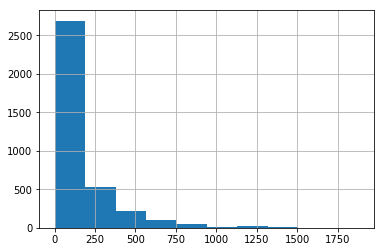

In [18]:
train["Product_ID"].value_counts().hist()

In [22]:
train["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [23]:
train["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [24]:
train["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [25]:
train["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [26]:
train["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [27]:
train["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

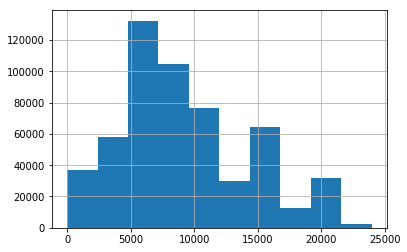

In [28]:
train["Purchase"].hist()

In [29]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


## Model Building

In [65]:
categorical_columns = ["Product_ID", "Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years",
                       "Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3"]

In [66]:
x_train=train.drop("Purchase",axis=1)

In [67]:
x_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [68]:
y_train=train["Purchase"]

In [69]:
x_train=x_train.fillna(0)


In [80]:
test = test.fillna(0)
train=train.fillna(0)

In [81]:
product_id_res = train.groupby(["Product_ID"])["Purchase"].mean()
avg_cost =train["Purchase"].mean()

In [82]:
product_id_res_map = {}

val = product_id_res.iteritems()
for key, value in val:
    p_id = str(key)
    product_id_res_map[p_id] = value

In [83]:
def get_purchase_mean(product_id, product_category=None, key=None):
    key_pair = str(product_id)
    key_pair_pid = str(product_id) + str(product_category)
    if key == "1":
        if key_pair_pid in product_category_1_res:
            return product_category_1_res[key_pair_pid]
    elif key == "2":
        if key_pair_pid in product_category_2_res:
            return product_category_2_res[key_pair_pid]
    elif key == "3":
        if key_pair_pid in product_category_3_res:
            return product_category_3_res[key_pair_pid]
    if key_pair in product_id_res:
        return product_id_res[key_pair]
    return avg_cost

In [84]:
train["purchase_avg_by_p_id"] = map(lambda product_id: get_purchase_mean(product_id), train["Product_ID"])
test["purchase_avg_by_p_id"] = map(lambda product_id: get_purchase_mean(product_id), test["Product_ID"])

In [85]:
user_id_to_category_map = {}
customer_purchase_power = train.groupby("User_ID")["Purchase"].sum()
values = customer_purchase_power.iteritems()

In [86]:
for key, val in values:
    if val <= 146570.0:
        user_id_to_category_map[key] = 1
    elif val <= 205272.0:
        user_id_to_category_map[key] = 2
    elif val <= 279288.0:
        user_id_to_category_map[key] = 3
    elif val <= 383455.0:
        user_id_to_category_map[key] = 4
    elif val <= 521213.0:
        user_id_to_category_map[key] = 5
    elif val <= 698842.0:
        user_id_to_category_map[key] = 6
    elif val <= 942900.0:
        user_id_to_category_map[key] = 7
    elif val <= 1355245.0:
        user_id_to_category_map[key] = 8
    elif val <= 2069404.0:
        user_id_to_category_map[key] = 9
    else:
        user_id_to_category_map[key] = 10

In [87]:
def get_customer_category(user_id):
    if user_id in user_id_to_category_map:
        return user_id_to_category_map[user_id]
    return 5

In [88]:
train["user_category"] = map(lambda user_id: get_customer_category(user_id), train["User_ID"])
test["user_category"] = map(lambda user_id: get_customer_category(user_id), test["User_ID"])

In [90]:
for var in categorical_columns:
    lb = preprocessing.LabelEncoder()
    full_var_data = pd.concat((train[var], test[var]), axis=0).astype('str')
    lb.fit(full_var_data)
    train[var] = lb.transform(train[var].astype('str'))
    #test[var] = lb.transform(test[var].astype('str'))

In [91]:
train = train.drop(['Purchase'], axis=1)

train = np.array(train)

In [93]:
model =RandomForestClassifier()